In [16]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class RandomGraph():
    def __init__(self, nodes=2000):
        self._num_of_nodes = nodes
        self._edges = []
        self._nodes = []
        
    def generate(self, p = 0.5):
        g = nx.Graph()
        self._nodes = list(range(0, self._num_of_nodes))
        random.shuffle(self._nodes)
        g.add_nodes_from(self._nodes)
        for n1 in self._nodes:
            for n2 in self._nodes:
                if n1 != n2 and np.random.uniform(0, 1) < p:
                    g.add_edge(n1, n2)
        return g

In [34]:
class Watts_Strogatz_model():
    def __init__(self, nodes=2000):
        self._num_of_nodes = nodes
        self._edges = []
        self._nodes = []
    
    def generate(self, p):
        g = nx.Graph()
        self._nodes = list(range(0, self._num_of_nodes))
        for n in self._nodes:
            g.add_edge(n, self._nodes[n-1])
            g.add_edge(n, self._nodes[n-2])
            if np.random.uniform(0, 1) < p:
                new_connection = self._nodes[random.randint(0, self._num_of_nodes-1)]
                while (new_connection == n):
                    new_connection = self._nodes[random.randint(0, self._num_of_nodes)]
                g.add_edge(n, new_connection)
        return g

In [47]:
class Barabasi_Albert_model():
    def __init__(self, nodes=2000):
        self._num_of_nodes = nodes
        self._nodes = []
        self._edges = []
        
    def generate(self, m_0=3):
        g = nx.Graph()
        self._nodes = list(range(0, self._num_of_nodes))
        for i in range(len(self._nodes)):
            if i < m_0:
                [g.add_edge(self._nodes[i], new_n) for new_n in self._nodes[0:i-1]]
            if i > m_0:
                m = random.randint(0, m_0)
                for j in range(i):
                    degrees = [val for (node, val) in g.degree()]
                    p = m/sum(degrees[0:i-1])
                    if np.random.uniform(0, 1) < p:
                        g.add_edge(self._nodes[i], self._nodes[j])
        return g

### Visualizations and characteristics

#### Random Graph

In [10]:
RG = RandomGraph().generate()

Number of nodes: 1999
Number of edges: 1497656
Average degree: 1498.4052026013007
Variance of degree: 371.2355107018242


(array([  3.,  17.,  94., 304., 495., 560., 348., 139.,  32.,   7.]),
 array([1427. , 1440.9, 1454.8, 1468.7, 1482.6, 1496.5, 1510.4, 1524.3,
        1538.2, 1552.1, 1566. ]),
 <BarContainer object of 10 artists>)

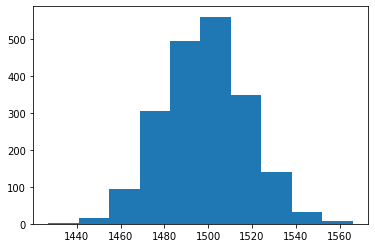

In [19]:
print(f"Number of nodes: {RG.number_of_nodes()}")
print(f"Number of edges: {RG.number_of_edges()}")
degrees = [val for (node, val) in RG.degree()]
print(f"Average degree: {np.mean(degrees)}")
print(f"Variance of degree: {np.var(degrees)}")
plt.hist(degrees)

KeyboardInterrupt: 

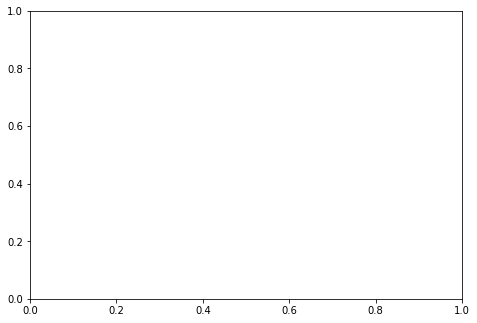

In [20]:
nx.draw(RG)

#### Watts-Strogatz model

In [35]:
WSM = Watts_Strogatz_model(10).generate(1)

Number of nodes: 10
Number of edges: 26
Average degree: 5.2
Variance of degree: 0.5599999999999999


(array([2., 0., 0., 0., 0., 4., 0., 0., 0., 4.]),
 array([4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ]),
 <BarContainer object of 10 artists>)

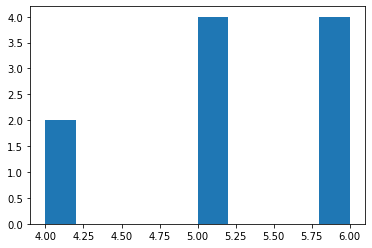

In [37]:
print(f"Number of nodes: {WSM.number_of_nodes()}")
print(f"Number of edges: {WSM.number_of_edges()}")
degrees = [val for (node, val) in WSM.degree()]
print(f"Average degree: {np.mean(degrees)}")
print(f"Variance of degree: {np.var(degrees)}")
plt.hist(degrees)

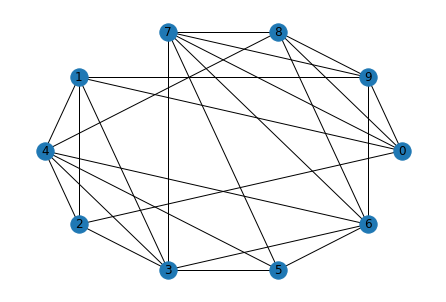

In [36]:
nx.draw_circular(WSM, with_labels=True)

#### Barabasi-Albert model

In [48]:
BAM = Barabasi_Albert_model(10).generate()

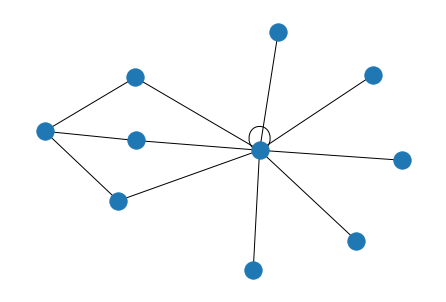

In [50]:
nx.draw(BAM)